In [ ]:
import os
import re
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Explo/processed (1).csv', index_col=[0])
df

,target,Message
0,0,upset update facebook texting might cry result...
1,0,dived many time ball managed save 50 rest go b...
2,0,whole body feel itchy like fire
3,0,behaving mad see
4,0,whole crew
...,...,...
1599994,4,woke school best feeling ever
1599995,4,thewdbcom cool hear old walt interview â
1599996,4,ready mojo makeover ask detail
1599997,4,happy 38th birthday boo alll time tupac amaru ...


In [ ]:
df.dropna(inplace=True)
df['target'] = df['target'].replace([0, 4],[0,1])
df=df.reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df['Message']
y = df['target']

X_train, X_val, y_train, y_val =train_test_split(X, y, test_size=0.2, random_state=2020)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf = TfidfVectorizer(ngram_range=(1, 3),
                         binary=True,
                         smooth_idf=False)
X_train_tfidf = tf_idf.fit_transform(X_train)
X_val_tfidf = tf_idf.transform(X_val)

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    kf = StratifiedKFold(5, shuffle=True, random_state=1)
    auc = cross_val_score(
        model, X_train_tfidf, y_train, scoring="roc_auc", cv=kf)

    return auc.mean()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_curve, auc

def evaluate_roc(probs, y_true):
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_true, preds)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

AUC: 0.8634
Accuracy: 78.18%


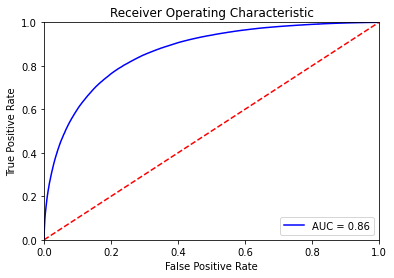

In [ ]:
nb_model = MultinomialNB(alpha=1.9)
nb_model.fit(X_train_tfidf, y_train)
probs = nb_model.predict_proba(X_val_tfidf)

evaluate_roc(probs, y_val)

In [ ]:
probs

array([[0.40000428, 0.59999572],
       [0.15001357, 0.84998643],
       [0.84762589, 0.15237411],
       ...,
       [0.0625043 , 0.9374957 ],
       [0.85869493, 0.14130507],
       [0.18757355, 0.81242645]])

In [ ]:
print(X_val)

1542124    lol okay bit crazy time admit nothin particula...
1203286                                  thanks kind message
62330                  yeah made sad everyfink made ppl hate
148260                           like get poor old fatso tho
591314                                meeting 830am tomorrow
                                 ...                        
639910            want play wii stupid sister friend playing
1159043              ooocooli found old eric claptons cd yay
1213861                                        hello twitter
673670     yeah esp hiv outbreak recently didnt even get ...
1397957                                               sebday
Name: Message, Length: 318481, dtype: object
